# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Sai Puneeth Reddy Gottam - 429209
    
    2. Hemanth Kethinedi - 429242
    
    3.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [2]:
#your imports (only use libraries provided in the environment)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metric
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from p_decision_tree.DecisionTree import DecisionTree
import graphviz,sklearn
import pydotplus, networkx
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set (18 points)

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes. **(0.5 point)**

In [2]:
# Your answer goes here
AB_orig = pd.read_csv('AirBnB_original.csv')
AB_orig.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


### Basic Cleaning (4 points)

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove? **(0.5 points)**

In [3]:
# Your answer goes here
B = AB_orig.dropna()
print(f'{len(AB_orig)-len(B)} rows have NaN values and are removed')

1477 rows have NaN values and are removed


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed? **(0.5 point)**

In [4]:
# Your answer goes here
New_AB = B.drop_duplicates(subset='id')
#New_AB.info()
#New_AB.head()
a = len(B) - len(New_AB)
print(f'There are {a} duplicate rows with same id')

There are 389 duplicate rows with same id


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation. **(1 point)**

In [3]:
# Your answer goes here
df = pd.read_csv('AirBnB_cleaned.csv')
#df.head()
print("Average price is ", np.mean(df['price']))
print('1st quartile of Price is', np.percentile(df['price'], 25))
print('3rd quartile of Price is',np.percentile(df['price'], 75))
print('Standard deviation of Price is',np.std(df['price']))

Average price is  625.4636797380085
1st quartile of Price is 340.0
3rd quartile of Price is 913.0
Standard deviation of Price is 331.2339031651564


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset. **(2 points)**

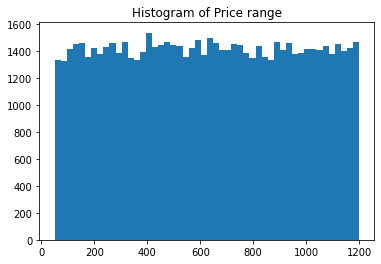

Text(0.5, 1.0, 'Box plot of Price range')

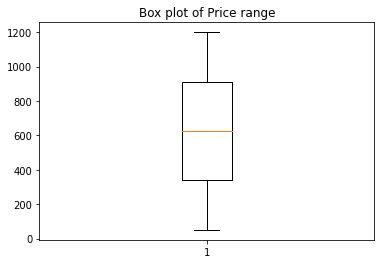

In [6]:
# Your answer goes here
plt.hist(df['price'], bins = 50)
plt.title('Histogram of Price range')
plt.show()

plt.boxplot(df['price'])
plt.title('Box plot of Price range')

### Exploring Price Relationships (3 points)

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment


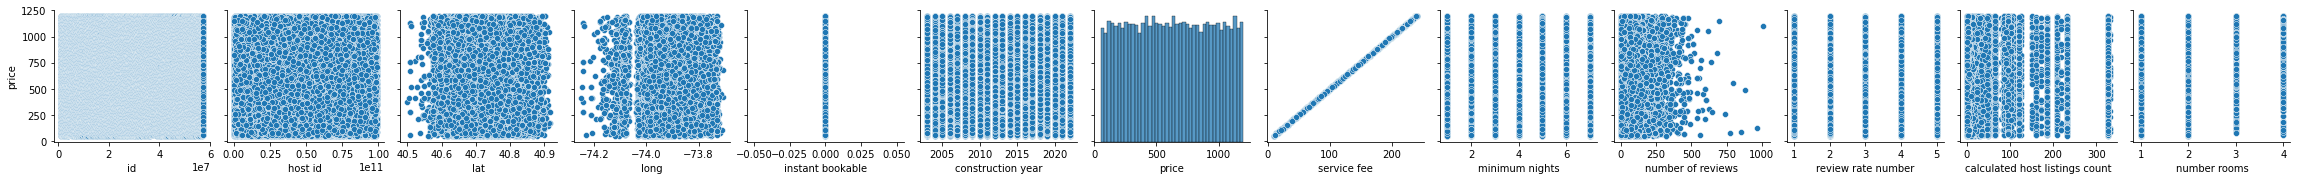

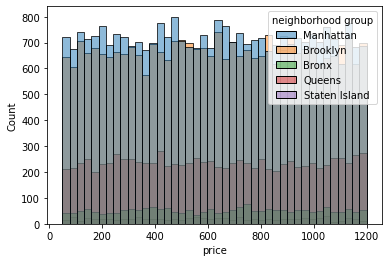

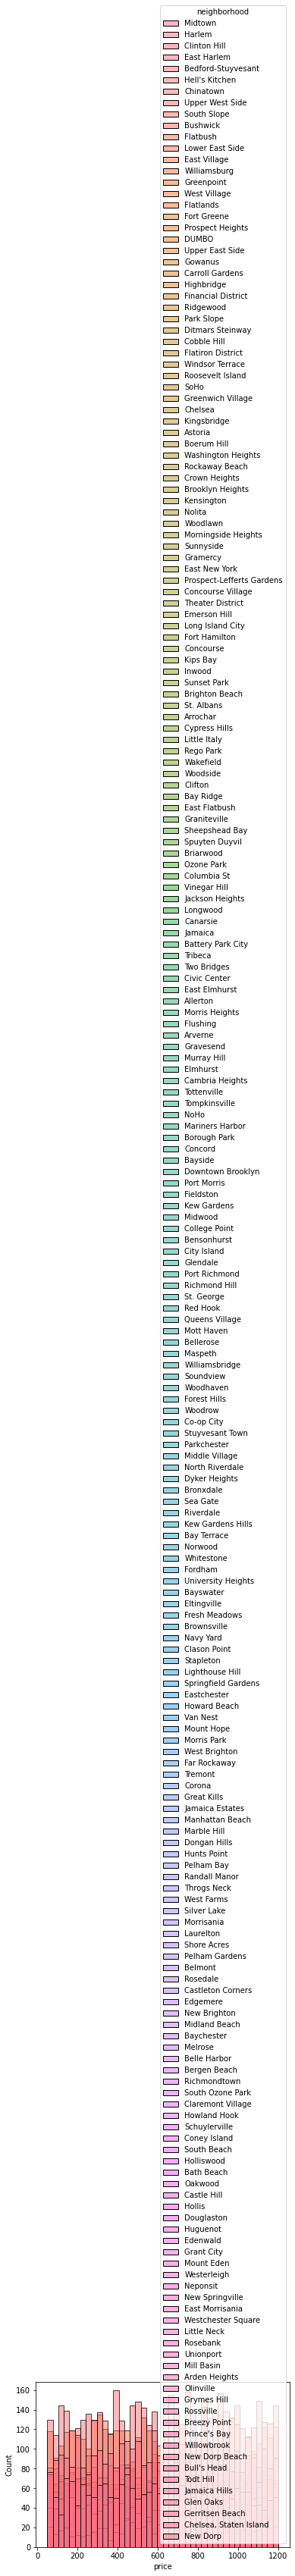

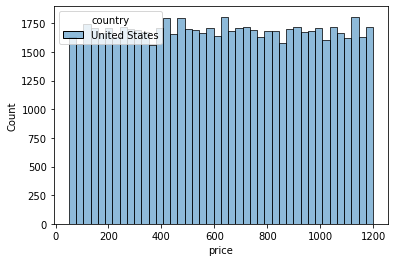

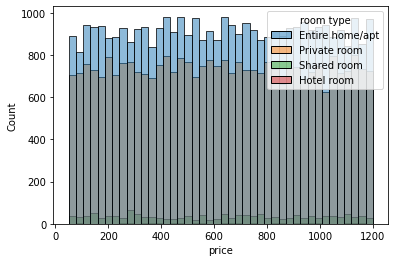

In [7]:
# Your answer goes here
sns.pairplot(df, y_vars=['price'])
plt.show()
sns.histplot(data=df,x='price',hue='neighborhood group')
plt.show()
sns.histplot(data=df,x='price',hue='neighborhood')
plt.show()
sns.histplot(data=df,x='price',hue='country')
plt.show()
sns.histplot(data=df,x='price',hue='room type')
plt.show()

_Answer:_ 
Features like id,hostid, lat,long,country code by definition can be excluded from using them in prediction as they have no effect on price. Instant bookable and Country have only 1 unique value and hence can also be neglected in predicting price. Neighborhood group and room type have pattern as we can see there the count of values vary in different price ranges.For example, majority of the data points have single type of room in all price ranges.
Where as featues like Contruction year, Service fee, Minimum Nights, Review rate number,Number rooms are the only ones that have a pattern with price. Therfore they might be a factor be pricing.

### Univariate Analysis (4.5 points)

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision? **(1 point)**

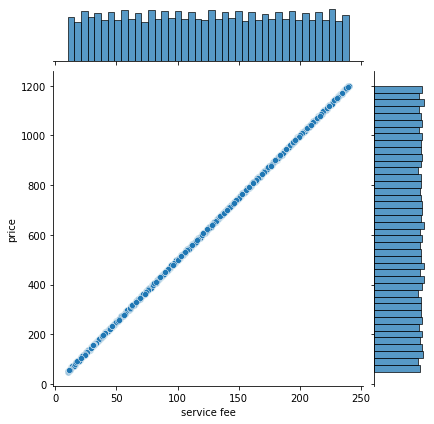

In [8]:
# Your answer goes here
sns.jointplot(data=df, y='price', x='service fee')

_Answer:_
Service fee is directly helpful in predicting the price as we can see from the jointplot that they are linearly proportional.


Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation. **(1 point)**

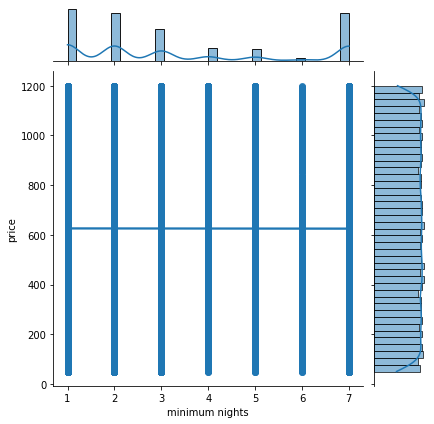

In [9]:
# Your answer goes here
sns.jointplot(data=df, y='price', x='minimum nights', kind='reg')

_Answer:_
Minimun nights and price has no concrete relationship. All unique values of minumum nights has price range from 50 to 1200 and this does not help in predicting the price. Even the regression model above is very undefit and looks very wrong for establishing a relationship between these 2 features.


To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price? **(2.5 point)**

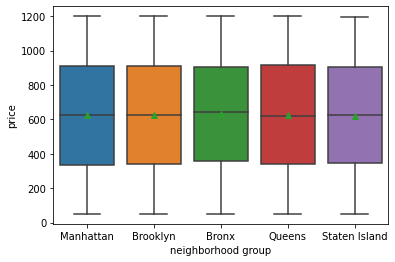

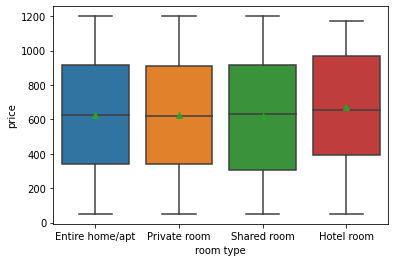

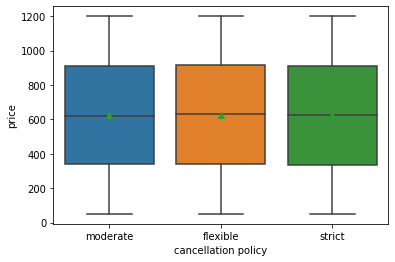

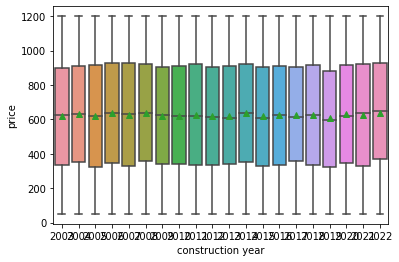

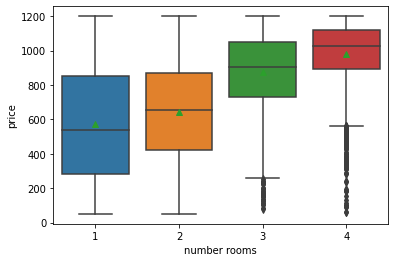

In [10]:
# Your answer goes here
#plt.boxplot(df['construction year'],showmeans = 'TRUE')
#plt.show()
#print(np.mean(df['construction year']))
#plt.boxplot(df['number rooms'],showmeans = 'TRUE')
#plt.show()
#df['number rooms'].mean()
sns.boxplot(data=df, y='price',x='neighborhood group',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='room type',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='cancellation policy',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='construction year',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='number rooms',showmeans=True)
plt.show()

_Answer:_
Only the "Number rooms" feature has an individual impact on price as we can see from the all boxplots above. All other features have even distribution of price across the price range and we cannot concretely find relationship between price and these features. But considering the number of rooms feature, as the number of rooms increase, the median and mean value increase and also the price range changes with different rooms.


### Multivariate Analysis (5 points)

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision. 

#### Multivariate Analysis for Neighborhood Group 

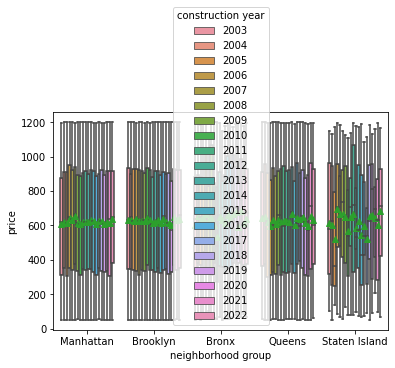

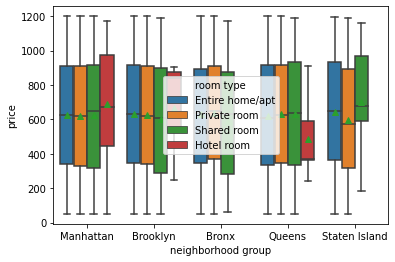

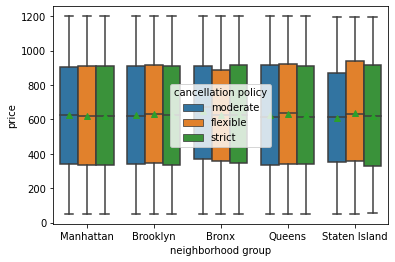

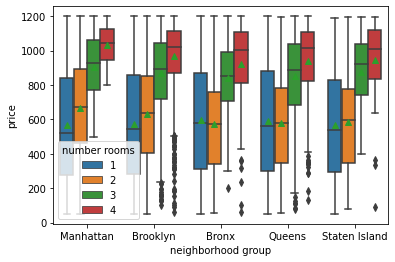

In [11]:
# Your answer goes here
sns.boxplot(data=df, y='price',x='neighborhood group',hue='construction year',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='neighborhood group',hue='room type',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='neighborhood group',hue='cancellation policy',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='neighborhood group',hue='number rooms',showmeans=True)
plt.show()


_Answer:_
Neighborhood group and number of rooms has different price ranges for different values. So this shows they are combinedly influencing the price as that can be visualised in above plot. 

Neighborhood group and room type has a small dependency. For example, Hotel room type has different price range in different neighborhoods and this might help in narrowing the price given a neighborhood. But the rest of other room types as almost similar in all neighborhoods.

The other combinations are evenly distributed and has no conclusive and combined effect in determining price. 


#### Multivariate Analysis for Room Type

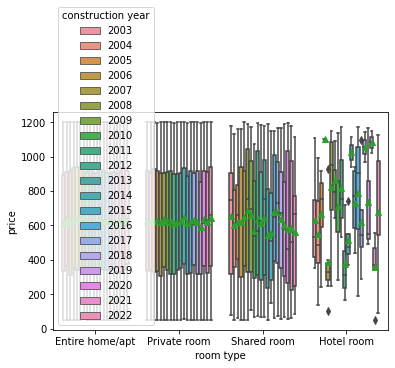

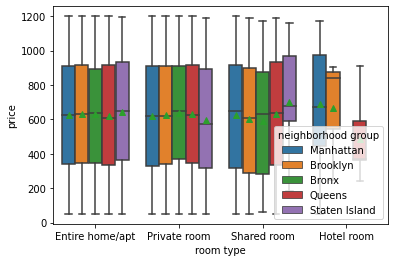

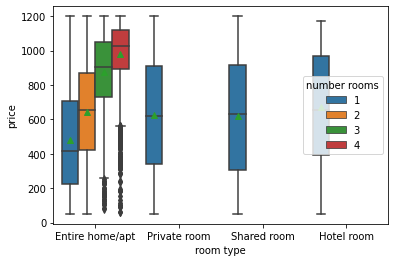

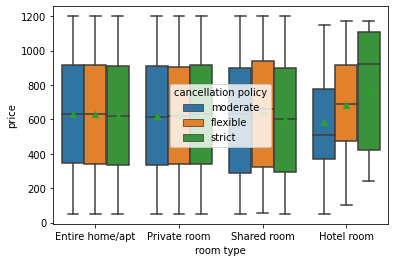

In [12]:
# Your answer goes here
sns.boxplot(data=df, y='price',x='room type',hue = 'construction year',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='room type',hue = 'neighborhood group',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='room type',hue = 'number rooms',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='room type',hue = 'cancellation policy',showmeans=True)
plt.show()

_Answer:_
Room type and number of rooms has the highest effect on price of the 4 combinations. Only 1 number of rooms has price in present in all 4 room types and this will help in clustering the data.

Apart from the only Hotel room type shows huge variance with respect to neighborhood group, construction year and cancellation policy. Other room types combinations has no specific relations with price.  

#### Multivariate Analysis for Number of Rooms

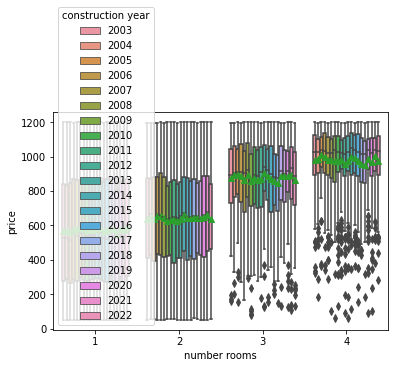

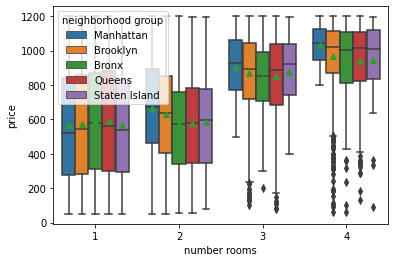

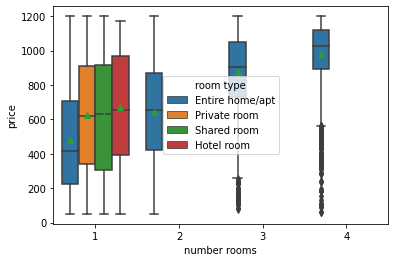

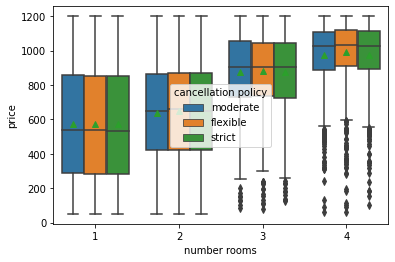

In [13]:
# Your answer goes here
sns.boxplot(data=df, y='price',x='number rooms',hue='construction year',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='number rooms',hue='neighborhood group',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='number rooms',hue='room type',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='number rooms',hue='cancellation policy',showmeans=True)
plt.show()


_Answer:_
In all combinations, 3,4 number rooms has high variance and this might help in predicting the price. 



#### Multivariate Analysis for Construction Year

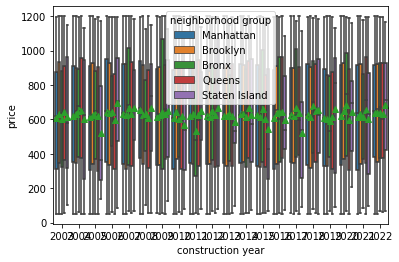

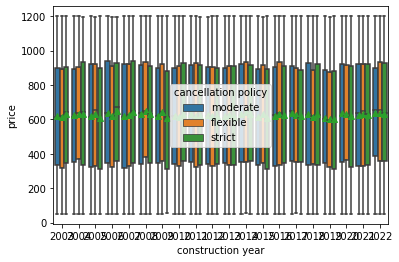

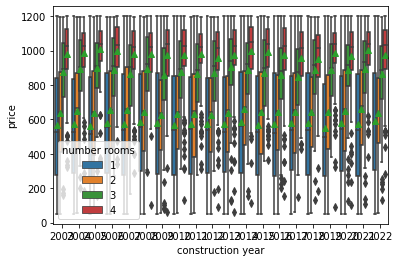

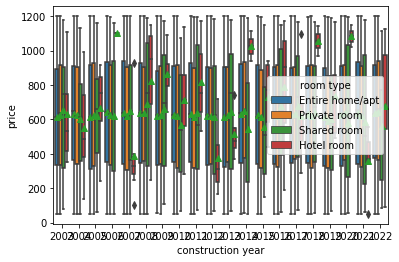

In [14]:
# Your answer goes here
sns.boxplot(data=df, y='price',x='construction year',hue = 'neighborhood group',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='construction year',hue = 'cancellation policy',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='construction year',hue = 'number rooms',showmeans=True)
plt.show()
sns.boxplot(data=df, y='price',x='construction year',hue = 'room type',showmeans=True)
plt.show()

_Answer:_

As seen above, the plot looks same for all construction years in all combinations.All combinations of features with construction year has no significant explanation and influence on price

### Selection of Variables (1 point)

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_
Neighborhood group, room type, number of rooms has high influnce on price when considered together. And I might consider using these features among the given 5 features. Construction year has no combined impact with any other feature combination.

## Question 2: Setting the Price (45 points)

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline (5 points)

First, you want to set a baseline to compare against. You use the mean absolute error as metric. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [15]:
# Your answer goes here
X1 = df[['neighborhood group','room type','number rooms']]
y1 =df[['price']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.05, random_state=42)
baseline = y_train1['price'].mean()  #considered avg price of all apartments in training set
print(baseline)  

624.929018261787


## Decision Tree (15 points)

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600]. **(2 points)**

In [16]:
# Your answer goes here
bins = pd.IntervalIndex.from_tuples([(49, 200), (200, 400), (400, 600),(600,800),(800,1000),(1000,1200)])
df['Price bins'] = pd.cut(df['price'],bins)
#df.head()

Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before. **(0.5 point)**

In [17]:
# Your answer goes here
X2 = df[['neighborhood group','room type','number rooms','price','Price bins']]
X2_train2, X2_test2 = train_test_split(X2, test_size=0.05, random_state=42)
X_train2 = X2_train2[['neighborhood group','room type','number rooms','Price bins']]
X_test2 = X2_test2[['neighborhood group','room type','number rooms','Price bins']]

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy? **(5 points)**

Note: For this task, you must use the p_decision_tree library.

In [18]:
# Your answer goes here
indices = [2,10,18,19]
columns = df.columns[indices]
descriptive_features = columns[:-1]
#The last column is considered as label
label = columns[-1]

#Converting all the columns to string
for column in columns:
    X_train2[column]= X_train2[column].astype(str)

data_descriptive = X_train2[descriptive_features].values
data_label = X_train2[label].values

/var/folders/dj/37bwxrq91cg110rcxxbr3fp00000gn/T/ipykernel_9147/312549699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train2[column]= X_train2[column].astype(str)


In [19]:
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,10)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

#print(dot)

print("System entropy: ", format(decisionTree.entropy))

You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
System entropy:  2.5769427958177795


What is the first feature the decision tree splits on? **(0.5 point)**

_Answer:_
'Number rooms'


Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

**(1 point)**

_Answer:_
1.Manhattan, 1-room, Private room  - Predicted price is 500 (Bin (400,600])
2.Staten Island, 1-room, Shared room - Predicted price is 700 (Bin (600,800])


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage. **(1 point)**

In [20]:
# Your answer goes here
myapt = ['1-room','Entire home/apt','Queens'] # I considered this as my apartment
price_DT = 300 #price bin is (200,400]

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [21]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, graph, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<2*len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above. **(2 points)**

In [22]:
# Your answer goes here
predictor = get_predictor(dot)
features = get_prediction_features(predictor)
predictions = [get_predicted_bin(instance = X_test2.iloc[i],predictor = predictor, features = features) for i in range (0,len(X_test2))]



You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error? **(3 points)**

In [23]:
# Your answer goes here
abc = X_test2 #copy of test set
abc['predicted bins'] = predictions #adding predicted bins column to copy df
abc['predicted value'] = abc['predicted bins']
abc= abc.replace({'predicted value': {'(1000, 1200]': 1100, '(600, 800]' : 700, '(200, 400]' : 300, '(400, 600]' : 500,'(800, 1000]': 900}}) #replacing the bins with mean
abc['price'] = X2_test2['price']

print(mean_absolute_error(abc['price'], abc['predicted value']))

278.9664126446514


In [24]:
abc.head() #new dataframe with predicted bins and prices

,neighborhood group,room type,number rooms,Price bins,predicted bins,predicted value,price
32578,Manhattan,Entire home/apt,4,"(800, 1000]","(1000, 1200]",1100,801
46620,Queens,Shared room,1,"(200, 400]","(600, 800]",700,281
64714,Manhattan,Entire home/apt,2,"(800, 1000]","(600, 800]",700,918
17969,Manhattan,Entire home/apt,2,"(200, 400]","(600, 800]",700,260
45471,Manhattan,Entire home/apt,1,"(200, 400]","(200, 400]",300,380


## Clustering (23 points)

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding (2 points)

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [25]:
# Your answer goes here
X_train3 = X2_train2[['neighborhood group','room type','number rooms']] #slicing the label.
X_test3 = X2_test2[['neighborhood group','room type','number rooms']]
#X_onehot_train3 = pd.get_dummies(X_train3)
#X_onehot_test3 = pd.get_dummies(X_test3)
ohe = OneHotEncoder().fit(X_train3)
X_onehot_train3 = ohe.transform(X_train3)
X_onehot_test3 = ohe.transform(X_test3)

### Choosing number of clusters (8 points)

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

In [26]:
# Your answer goes here
X_train3['4clusters'] = KMeans(n_clusters = 4,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['5clusters'] = KMeans(n_clusters = 5,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['6clusters'] = KMeans(n_clusters = 6,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['7clusters'] = KMeans(n_clusters = 7,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['8clusters'] = KMeans(n_clusters = 8,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['9clusters'] = KMeans(n_clusters = 9,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['10clusters'] = KMeans(n_clusters = 10,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['11clusters'] = KMeans(n_clusters = 11,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['clusters12'] = KMeans(n_clusters = 12,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['13clusters'] = KMeans(n_clusters = 13,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['14clusters'] = KMeans(n_clusters = 14,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['15clusters'] = KMeans(n_clusters = 15,n_init=100,random_state=100).fit_predict(X_onehot_train3)
X_train3['price'] = X2_train2['price']#adding price colum

/var/folders/dj/37bwxrq91cg110rcxxbr3fp00000gn/T/ipykernel_9147/1441707184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train3['4clusters'] = KMeans(n_clusters = 4,n_init=100,random_state=100).fit_predict(X_onehot_train3)


In [27]:
#grouping the sum of prices with assigned clusters
mean4 = X_train3.groupby('4clusters')['price'].mean()
mean5 = X_train3.groupby('5clusters')['price'].mean()
mean6 = X_train3.groupby('6clusters')['price'].mean()
mean7 = X_train3.groupby('7clusters')['price'].mean()
mean8 = X_train3.groupby('8clusters')['price'].mean()
mean9 = X_train3.groupby('9clusters')['price'].mean()
mean10 = X_train3.groupby('10clusters')['price'].mean()
mean11 = X_train3.groupby('11clusters')['price'].mean()
mean12 = X_train3.groupby('clusters12')['price'].mean()
mean13 = X_train3.groupby('13clusters')['price'].mean()
mean14 = X_train3.groupby('14clusters')['price'].mean()
mean15 = X_train3.groupby('15clusters')['price'].mean()

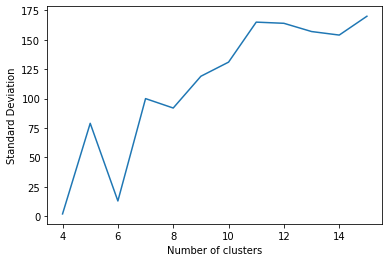

[  2  79  13 100  92 119 131 165 164 157 154 170]


In [28]:
a = np.arange(0,12)
a[0] = np.std(mean4)
a[1] = np.std(mean5)
a[2] = np.std(mean6)
a[3] = np.std(mean7)
a[4] = np.std(mean8)
a[5] = np.std(mean9)
a[6] = np.std(mean10)
a[7] = np.std(mean11)
a[8] = np.std(mean12)
a[9] = np.std(mean13)
a[10] = np.std(mean14)
a[11] = np.std(mean15)
X = np.arange(4,16,1)
Y = a
plt.plot(X,Y)
plt.ylabel('Standard Deviation')
plt.xlabel('Number of clusters')
plt.show()
print(a)

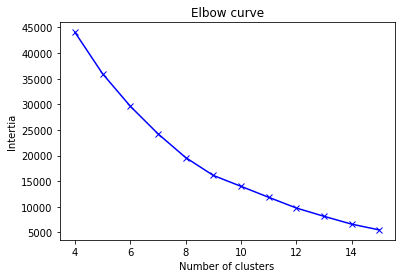

In [29]:
sum_sqrd_distances = []
K = range(4,16)
for i in K:
    kmeans = KMeans(n_clusters = i,n_init=100,random_state=100)
    kmeans.fit(X_onehot_train3)
    sum_sqrd_distances.append(kmeans.inertia_)
plt.plot(K,sum_sqrd_distances,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.title('Elbow curve')
plt.show()

_Answer:_
We used ELBOW METHOD to predict the optimal number of clusters.

Sum of squared distances between cluster points and their assigned cluster centroid is plotted above for different clusters. The intertia decreses with increasing number of clusters. This shows that the data points are being very well segmented into respective clusters. As 15 cluster model has less inertia, I would choose 15 clusters as my optimal number of clusters.


**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment (3 points)

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [30]:
# Your answer goes here
# cluster for 9 clusters
my = pd.DataFrame([['Queens','Entire home/apt',1]],columns = ['neighborhood group','room type','number rooms'])
my_onehot= ohe.transform(my)
cluster_model = KMeans(n_clusters=9,n_init=100,random_state=100).fit(X_onehot_train3)
cluster_labels = cluster_model.predict(X_onehot_train3)
my_cluster = cluster_model.predict(my_onehot)
print('Assigned cluster label is :',my_cluster[0])
clustermeans = X_train3.groupby('9clusters')['price'].mean()
price_KMeans = clustermeans[my_cluster[0]]
print ('Predicted price by KMeans clustering is : ', price_KMeans)

Assigned cluster label is : 0
Predicted price by KMeans clustering is :  620.8839499600746


### Evaluating clustering (10 points)

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [31]:
import umap.umap_ as umap

#Preprocessing numerical
full_data = X_train3 # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/saipuneeth/opt/anaconda3/envs/env-IDS2022-23/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result. **(5 points)**

<AxesSubplot: >

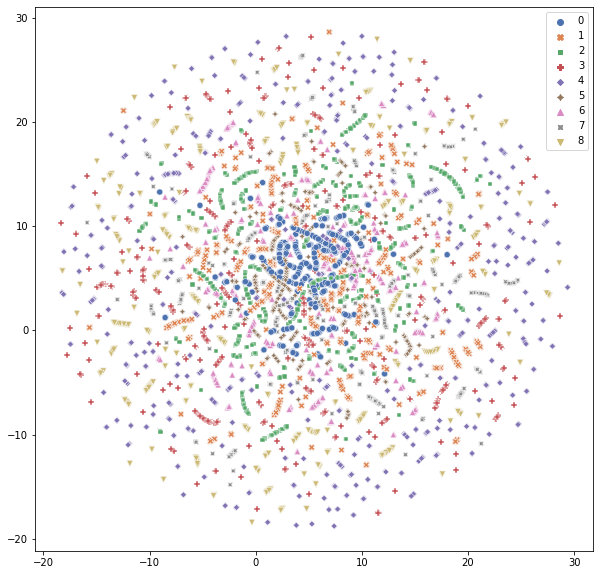

In [32]:
# Your answer goes here
plt.figure(figsize=(10,10))
sns.scatterplot(x=dimension1,y=dimension2,hue=cluster_labels,style=cluster_labels,palette='deep')

_Answer:_
From the scatter plot above, the similar points does not seem to be paired into similar group. But we can see that some data points have same labels only at the specific area of the plot. For example, the data points with '0' as the cluster lable are majorly in the center. And majority of the points near the outer side are from labels '3,4,8'. 


We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices. **(5 points)**

In [33]:
# Your answer goes here
predictions_test = cluster_model.predict(X_onehot_test3)
X_test3['predicted cluster'] = predictions_test
X_test3['predicted price'] = predictions_test
for i in range(0,X_onehot_test3.shape[0]):
    X_test3['predicted price'].iloc[i] = clustermeans[predictions_test[i]]
X_test3['price'] = X2_test2['price']
print('Mean absolute error for clustering is :',mean_absolute_error(X_test3['predicted price'],X_test3['price']))

Mean absolute error for clustering is : 266.9072849856421


/var/folders/dj/37bwxrq91cg110rcxxbr3fp00000gn/T/ipykernel_9147/3613834635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test3['predicted cluster'] = predictions_test
/var/folders/dj/37bwxrq91cg110rcxxbr3fp00000gn/T/ipykernel_9147/3613834635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test3['predicted price'].iloc[i] = clustermeans[predictions_test[i]]


## Final comments on the price prediction (2 points)

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_

The 3 approaches have high mean absolute error and therefore may not be ideal approches for determining the prices. Out of the 3 approaches, clustering has less error. 

1 main reason for such a high error is maybe due to assiging the mean of bins , or clusters to the test values . I mean, for a price of 601 , it will be assigned to bin (600,800) and will be given mean price of 700 during fitting the model where as the apartment with price 599 will be assgined to bin (400,600) and will be given a mean price of 500 . But as you can see, the actual price difference is very less but the assinged mean price is very high. 

## Question 3: Investigating Price Elasticity (32 Points)

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice. **(2 points)**

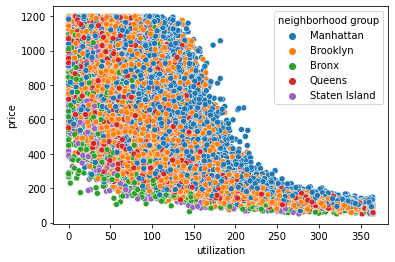

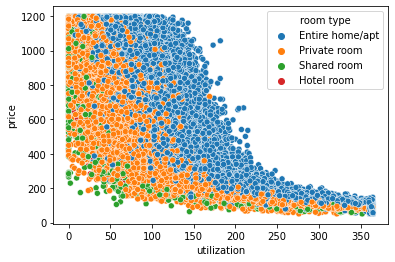

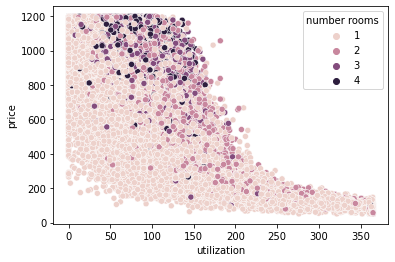

In [4]:
# Your answer goes here
data = pd.read_csv('AirBnB_utilization.csv')
#data.head()
sns.scatterplot(data=data,x='utilization',y='price',hue='neighborhood group')
plt.show()
sns.scatterplot(data=data,x='utilization',y='price',hue='room type')
plt.show()
sns.scatterplot(data=data,x='utilization',y='price',hue='number rooms')
plt.show()
#sns.boxplot(data=data,x='utilization',y='price',hue='room type')

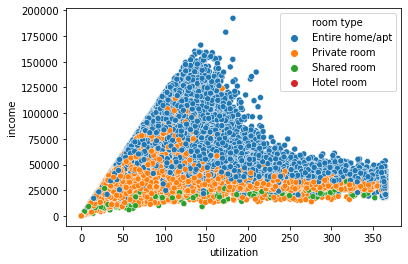

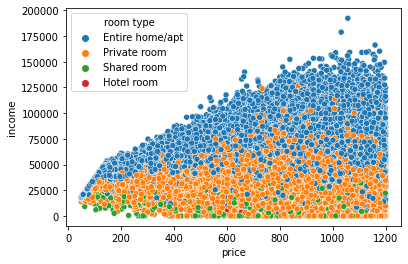

In [5]:
new_data = data 
new_data['income'] = new_data['price'] * new_data['utilization']
sns.scatterplot(data=new_data,x='utilization',y='income',hue='room type')
plt.show()
sns.scatterplot(data=new_data,x='price',y='income',hue='room type')
plt.show()

Interpretation:
As we can see above that the low price apartments have high utilizations and viceversa. So this shows not only price but also its combination with utilization is helpful in maximizing our income as we have to find optimal price which has good price and utilization for our apartment.
Income is high for utilization in range of 100 to 200. So even though utilization is high, income is not that high. 
In contrast, income is high for high priced apartment.

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity (25 points)
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

#### Prepare the data set by splitting, one-hot encoding, and normalizing. (5 points)

In [35]:
# Your answer goes here
X = data[['neighborhood group','room type','number rooms','price']]
y =data[['utilization']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
#ohe2 = OneHotEncoder(handle_unknown='ignore').fit(X_train)
#X_train_onehot = ohe2.transform(X_train)
#X_test_onehot = ohe2.transform(X_test)
X_train_onehot= pd.get_dummies(X_train) #used get_dummies so that price will not be onehot encoded. While ohe2 above will onehot encode price as well creating 1000+ feature columns
X_test_onehot = pd.get_dummies(X_test)
X_train_norm = preprocessing.normalize(X_train_onehot) ## normalize inputs only.
X_test_norm = preprocessing.normalize(X_test_onehot)

For each technique, use 5-cross-fold validation for hyperparameter optimization and assess the performance on the test set. 

#### Regression (5 points)

Learn a linear regression to predict the utilization of an AirBnB.

In [36]:
# Your answer goes here
classifier1 = GridSearchCV(LinearRegression(),{}, cv = 5, verbose = 3)
model1 = classifier1.fit(X_train_norm,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.856 total time=   0.1s
[CV 2/5] END ..................................., score=0.871 total time=   0.1s
[CV 3/5] END ..................................., score=0.865 total time=   0.1s
[CV 4/5] END ..................................., score=0.868 total time=   0.1s
[CV 5/5] END ..................................., score=0.868 total time=   0.1s


What is the mean absolute error achieved on the test data?

In [37]:
# Your answer goes here
predictions1 = model1.predict(X_test_norm)
error1 = mean_absolute_error(y_test,predictions1)
print('Mean absolute error on test data is ', error1)

Mean absolute error on test data is  23.553818673980743


Show (draw!) the price elasticity for your apartment. 

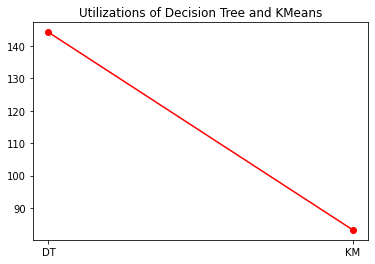

Utilizations [array([144.26376463]), array([83.20785642])]


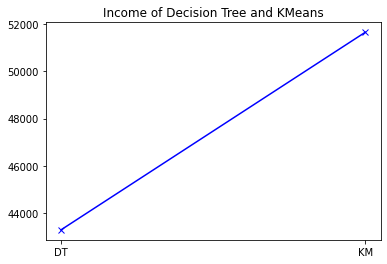

Incomes [array([43279.12938808]), array([51662.42256412])]


In [38]:
# Your answer goes here
#price_KMeans = 620.8839499600746
price_DT = 300
columns = X_test_onehot.columns
my_DT = pd.DataFrame([[1,price_DT,0,0,0,1,0,1,0,0,0]],columns =  columns)
my_KM = pd.DataFrame([[1,price_KMeans,0,0,0,1,0,1,0,0,0]],columns =  columns)
#my_DT = pd.DataFrame([['Queens','Entire home/apt',1,price_DT]],columns = ['neighborhood group','room type','number rooms','price'])
#my_KM = pd.DataFrame([['Queens','Entire home/apt',1,price_KMeans]],columns = ['neighborhood group','room type','number rooms','price'])
#myapt_onehot_DT = ohe2.transform(my_DT) #converting my apartment to dataframe with onehot with decision tree price prediction
#myapt_onehot_KM = ohe2.transform(my_KM) #converting my apt to onehot with price predicted from KMeans
myapt_onehot_DT = pd.get_dummies(my_DT)
myapt_onehot_KM = pd.get_dummies(my_KM)
utilization_DT1 = model1.predict(preprocessing.normalize(myapt_onehot_DT)) 
utilization_KM1 = model1.predict(preprocessing.normalize(myapt_onehot_KM))
y = [utilization_DT1[0],utilization_KM1[0]]
x = ['DT','KM']
plt.plot(x,y,'o-r')
plt.title('Utilizations of Decision Tree and KMeans')
plt.show()
print('Utilizations',y)
y2 = [utilization_DT1[0]*price_DT,utilization_KM1[0]*price_KMeans] 
plt.plot(x,y2,'bx-')
plt.title('Income of Decision Tree and KMeans')
plt.show()
print('Incomes',y2)

#### Linear SVR (5 points)

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [39]:
# Your answer goes here
paramgrid_SVR = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],'C':[0.1,1,10]}
model2 = GridSearchCV(LinearSVR(random_state=42, max_iter=20000),paramgrid_SVR, cv = 5, verbose = 3).fit(X_train_norm,np.ravel(y_train))



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..C=0.1, loss=epsilon_insensitive;, score=-0.055 total time=   0.0s
[CV 2/5] END ..C=0.1, loss=epsilon_insensitive;, score=-0.060 total time=   0.0s
[CV 3/5] END ..C=0.1, loss=epsilon_insensitive;, score=-0.053 total time=   0.0s
[CV 4/5] END ..C=0.1, loss=epsilon_insensitive;, score=-0.063 total time=   0.0s
[CV 5/5] END ..C=0.1, loss=epsilon_insensitive;, score=-0.060 total time=   0.0s
[CV 1/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.246 total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.244 total time=   0.0s
[CV 3/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.243 total time=   0.0s
[CV 4/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.244 total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.246 total time=   0.0s
[CV 1/5] END ....C=1, loss=epsilon_insensitive;, score=-0.036 total time=   0.0s
[CV 2/5] END ....C=1, lo

What is the mean absolute error achieved on the test data?

In [40]:
# Your answer goes here
predictions2 = model2.predict(X_test_norm)
print('Mean absolute error on test data is ', mean_absolute_error(y_test,predictions2))

Mean absolute error on test data is  28.197909886583556


Show (draw!) the price elasticity for your apartment. 

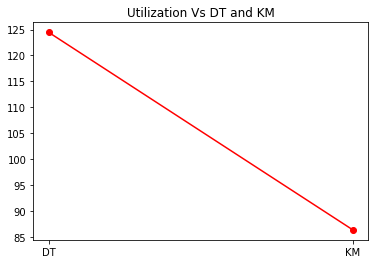

Utilizations [124.47308267417174, 86.42760177500139]


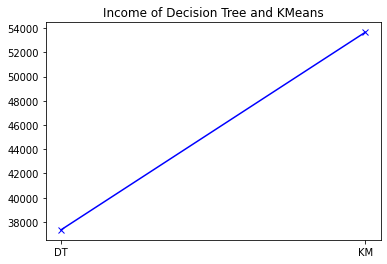

Incomes [37341.924802251524, 53661.51077563922]


In [41]:
# Your answer goes here
utilization_DT2 = model2.predict(preprocessing.normalize(myapt_onehot_DT)) 
utilization_KM2 = model2.predict(preprocessing.normalize(myapt_onehot_KM))
y = [utilization_DT2[0],utilization_KM2[0]]
x = ['DT','KM']
plt.plot(x,y,'o-r')
plt.title('Utilization Vs DT and KM')
plt.show()
print('Utilizations',y)
y2 = [utilization_DT2[0]*price_DT,utilization_KM2[0]*price_KMeans] 
plt.plot(x,y2,'bx-')
plt.title('Income of Decision Tree and KMeans')
plt.show()
print('Incomes',y2)

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression (2.5 points)

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [42]:
X_train_kernel = X_train
X_train_kernel['price2'] = X_train['price'] **2
X_train_kernel['price3'] = X_train['price'] **3 #creating new test DF with additional nonlinear features
X_train_kernel['avg price'] = X_train['price']/X_train['number rooms']  #used price/rooms also as nonlinear feature
#ohe3 = OneHotEncoder().fit(X_train_kernel)
X_kernel_onehot = pd.get_dummies(X_train_kernel)
X_kernel_norm = preprocessing.normalize(X_kernel_onehot)
X_test_kernel = X_test
X_test_kernel['price2'] = X_test['price'] **2
X_test_kernel['price3'] = X_test['price'] **3
X_test_kernel['avg price'] = X_test['price']/X_test['number rooms'] #creating new test DF with additional nonlinear features
X_test_kernel_onehot = pd.get_dummies(X_test_kernel)
X_test_kernel_norm = preprocessing.normalize(X_test_kernel_onehot)


In [43]:
# Your answer goes here
#param_grid1 = {'degree' : [2],"alpha": [1e0],'kernel': ['poly']}  
#grid1 = GridSearchCV(KernelRidge(), param_grid1, cv = 5, verbose = 3) 
grid1 =LinearRegression()
model3=grid1.fit(X_kernel_norm,np.ravel(y_train))

What is the mean absolute error achieved on the test data?

In [44]:
# Your answer goes here
predictions3 = model3.predict(X_test_kernel_norm)
print('Mean absolute error on test data is ', mean_absolute_error(y_test,predictions3))

Mean absolute error on test data is  27.139691694116156


Show (draw!) the price elasticity for your apartment. 

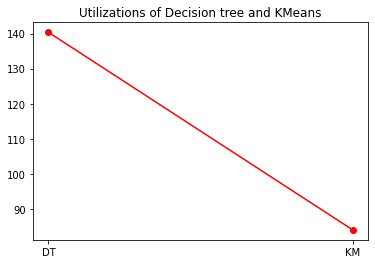

Utilizations [140.38059663772583, 83.98590278625488]


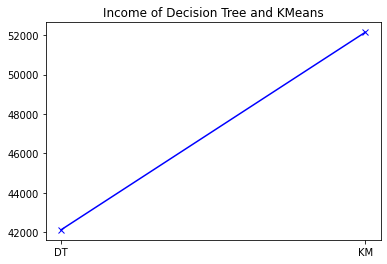

Incomes [42114.17899131775, 52145.49906289276]


In [45]:
# Your answer goes here
columns_kernel = X_test_kernel_onehot.columns
my_kernel_DT = pd.DataFrame([[1,price_DT,price_DT**2,price_DT**3,price_DT,0,0,0,1,0,1,0,0,0]],columns =  columns_kernel) #for kernel regression
my_kernel_KM = pd.DataFrame([[1,price_KMeans,price_KMeans**2,price_KMeans**3,price_KMeans,0,0,0,1,0,1,0,0,0]],columns =  columns_kernel) #for kernel regression
myapt_kernel_onehot_DT = pd.get_dummies(my_kernel_DT)
myapt_kernel_onehot_KM = pd.get_dummies(my_kernel_KM)
utilization_DT3 = model3.predict(preprocessing.normalize(myapt_kernel_onehot_DT)) 
utilization_KM3 = model3.predict(preprocessing.normalize(myapt_kernel_onehot_KM))
y = [utilization_DT3[0],utilization_KM3[0]]
x = ['DT','KM']
plt.plot(x,y,'o-r')
plt.title('Utilizations of Decision tree and KMeans')
plt.show()
print('Utilizations',y)
y2 = [utilization_DT3[0]*price_DT,utilization_KM3[0]*price_KMeans] 
plt.plot(x,y2,'bx-')
plt.title('Income of Decision Tree and KMeans')
plt.show()
print('Incomes',y2)

#### Kernels in SVR (2.5 points)

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [46]:
#Dataset with 25000 samples
X_train_new = X_kernel_norm[:25000] #used this instead of X_train_norm as it has additional features and if they are not required, weights are adjusted accordingly by the model
y_train_new = y_train[:25000]  


In [47]:
# Your answer goes here
param_grid = {'degree' : [2,3],'coef0':[1],'kernel': ['linear','poly']}  
grid = GridSearchCV(SVR(), param_grid, cv = 5, verbose = 3) 
model4=grid.fit(X_train_new,np.ravel(y_train_new))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .coef0=1, degree=2, kernel=linear;, score=-0.053 total time=  12.8s
[CV 2/5] END .coef0=1, degree=2, kernel=linear;, score=-0.042 total time=  12.7s
[CV 3/5] END .coef0=1, degree=2, kernel=linear;, score=-0.053 total time=  12.6s
[CV 4/5] END .coef0=1, degree=2, kernel=linear;, score=-0.047 total time=  12.6s
[CV 5/5] END .coef0=1, degree=2, kernel=linear;, score=-0.065 total time=  12.6s
[CV 1/5] END ...coef0=1, degree=2, kernel=poly;, score=-0.047 total time=  14.2s
[CV 2/5] END ...coef0=1, degree=2, kernel=poly;, score=-0.036 total time=  14.8s
[CV 3/5] END ...coef0=1, degree=2, kernel=poly;, score=-0.046 total time=  14.2s
[CV 4/5] END ...coef0=1, degree=2, kernel=poly;, score=-0.040 total time=  14.7s
[CV 5/5] END ...coef0=1, degree=2, kernel=poly;, score=-0.058 total time=  14.2s
[CV 1/5] END .coef0=1, degree=3, kernel=linear;, score=-0.053 total time=  12.5s
[CV 2/5] END .coef0=1, degree=3, kernel=linear;, 

What is the mean absolute error achieved on the test data?

In [48]:
# Your answer goes here
predictions4 = model4.predict(X_test_kernel_norm)
print('Mean absolute error on test data is ', mean_absolute_error(y_test,predictions4))

Mean absolute error on test data is  55.06593516355264


Show (draw!) the price elasticity for your apartment. 

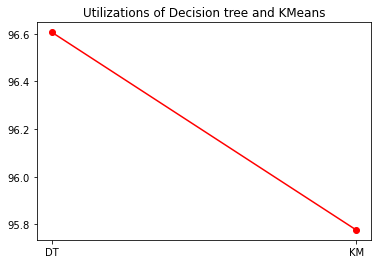

Utilizations [96.60595510700281, 95.77693293198777]


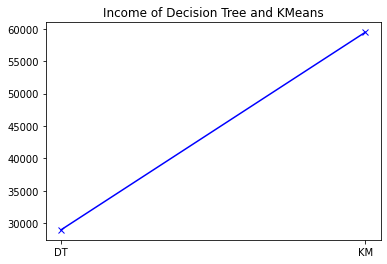

Incomes [28981.786532100843, 59466.36043387371]


In [51]:
# Your answer goes here
utilization_DT4 = model4.predict(preprocessing.normalize(myapt_kernel_onehot_DT)) 
utilization_KM4 = model4.predict(preprocessing.normalize(myapt_kernel_onehot_KM))
y = [utilization_DT4[0],utilization_KM4[0]]
x = ['DT','KM']
plt.plot(x,y,'o-r')
plt.title('Utilizations of Decision tree and KMeans')
plt.show()
print('Utilizations',y)
y2 = [utilization_DT4[0]*price_DT,utilization_KM4[0]*price_KMeans] 
plt.plot(x,y2,'bx-')
plt.title('Income of Decision Tree and KMeans')
plt.show()
print('Incomes',y2)


What is your conclusion on using kernels?

_Answer:_
In this case, using kernels has worsened our prediction since the error has not decreased. This can be interpreted as , there might me no special dependency of the non linear relations that we used as input on predicting price elasticity.

#### Neural Network (5 points)

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [52]:
# Your answer goes here
#Regressor = MLPRegressor(activation='tanh',learning_rate = 'adaptive', hidden_layer_sizes=(5,5),max_iter=1000)
param_grid2 = {"activation":['relu','tanh'],'max_iter':[1000],'learning_rate' : ['adaptive'],'hidden_layer_sizes':[(5,5),(60,30)]}  
Regressor = GridSearchCV(MLPRegressor(), param_grid2, cv = 5, verbose = 3)
model5 = Regressor.fit(X_train_norm,np.ravel(y_train)) 



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=1000;, score=0.891 total time=  14.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=1000;, score=0.813 total time=  25.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=1000;, score=0.893 total time=  13.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=1000;, score=0.816 total time=  29.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=1000;, score=0.895 total time=  17.9s
[CV 1/5] END activation=relu, hidden_layer_sizes=(60, 30), learning_rate=adaptive, max_iter=1000;, score=0.907 total time=  23.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(60, 30), learning_rate=adaptive, max_iter=1000;, score=0.907 total time=  18.9s
[CV 3/5] END activation=relu, hidden_lay

What is the mean absolute error achieved on the test data?

In [53]:
# Your answer goes here
predictions5 = model5.predict(X_test_norm)
print('Mean absolute error on test data is ', mean_absolute_error(y_test,predictions5))

Mean absolute error on test data is  19.219036174051006


Show (draw!) the price elasticity for your apartment. 

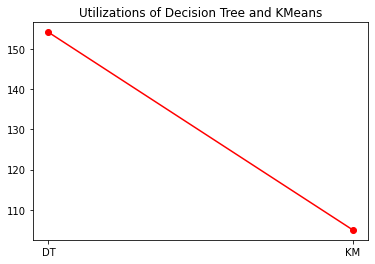

Utilzaitons [154.09734884719313, 105.01371135798253]


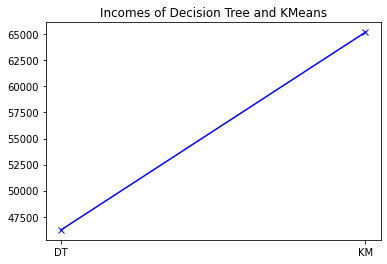

Incomes [46229.20465415794, 65201.32790791134]


In [54]:
# Your answer goes here
utilization_DT5 = model5.predict(preprocessing.normalize(myapt_onehot_DT)) 
utilization_KM5 = model5.predict(preprocessing.normalize(myapt_onehot_KM))
y = [utilization_DT5[0],utilization_KM5[0]]
y2 = [utilization_DT5[0] * price_DT,utilization_KM5[0] * price_KMeans]
x = ['DT','KM']
plt.plot(x,y,'o-r')
plt.title('Utilizations of Decision Tree and KMeans')
plt.show()
print('Utilzaitons',y)
plt.plot(x,y2,'bx-')
plt.title('Incomes of Decision Tree and KMeans')
plt.show()
print('Incomes',y2)

### Profit discrepencies when incorporating price elasticity (5 points)

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [55]:
# Your answer goes here
DT_utilizations = np.asarray([utilization_DT1[0],utilization_DT2[0],utilization_DT3[0],utilization_DT4[0],utilization_DT5[0]],dtype=np.float64) 
KM_utilizations = np.asarray([utilization_KM1[0],utilization_KM2[0],utilization_KM3[0],utilization_KM4[0],utilization_KM5[0]],dtype=np.float64) 
maxDT1 = np.argmax(DT_utilizations)
maxKM1 = np.argmax(KM_utilizations)
models = ['Linear Regression','Linear SVR','Kernels in Regression','Kernels in SVR','Neural Networks']
#price multiplied by utilization gives income
incomes_DT = DT_utilizations * price_DT 
incomes_KM = KM_utilizations * price_KMeans
maxDT2 = np.argmax(incomes_DT)
maxKM2 = np.argmax(incomes_KM)
print(f'Utilization and income are max for decision tress for {models[maxDT1]} approach')
print(f'Utilization and income are max for clustering for {models[maxKM1]} approch')
max_profit_DT = np.max(incomes_DT)  
max_profit_KM = np.max(incomes_KM)

if max_profit_DT>max_profit_KM: #comparing income of 2 approaches
    print("Profit is more from the price prediction of Decision tree and the profit is ",max_profit_DT)
    print('Profit difference compared to other is ',max_profit_DT-max_profit_KM)
else:
    print("Profit is more from the price prediction of clustering and the profit is ",max_profit_KM)
    print('Profit difference compared to other is ',max_profit_KM-max_profit_DT)

Utilization and income are max for decision tress for Neural Networks approach
Utilization and income are max for clustering for Neural Networks approch
Profit is more from the price prediction of clustering and the profit is  65201.32790791134
Profit difference compared to other is  18972.1232537534


/var/folders/dj/37bwxrq91cg110rcxxbr3fp00000gn/T/ipykernel_9147/888226801.py:2: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  DT_utilizations = np.asarray([utilization_DT1[0],utilization_DT2[0],utilization_DT3[0],utilization_DT4[0],utilization_DT5[0]],dtype=np.float64)
/var/folders/dj/37bwxrq91cg110rcxxbr3fp00000gn/T/ipykernel_9147/888226801.py:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  KM_utilizations = np.asarray([utilization_KM1[0],utilization_KM2[0],utilization_KM3[0],utilization_KM4[0],utilizat

_Answer:_

Out of all 5 models, Neural networks works pretty good than other models as its error is the least of 5. Also the income for our apartment is highest from the predicitions of Neural networks. As it seems, neural networks predictions as ground truth, and also the income is highest with these model. So the proposed price of clustering might be optimal in this case.

Even though the utilitization is high with the prediction of price by Decision tree, the income is high with price predicted by clustering and it is better to choose this option.

# Question 4: Conclusion (5 points)

Summarize your findings and discuss limitations.

_Answer:_ 
Data is very important for the predictions and better the data , better the result. We have to clean the data before evaluating the modesl. Here we chose to remoce the anomalies by removing NaN values. We can also replace NaN with mean/median/mode if they have important attributes. Visualtion of data can be very helpful in feature selection and understand the dependencies of different attriubutes.

Out of the five models to predict the price elasticity, Neural networks for some reason gives best result even when the untransformed data (i.e, no non linear inputs of prcie)is used as input compared to kernel methods in regression. Neural networks also captures  non linear relations on its own. 

We used pd.get_dummies for one hot encoding because it converts only the categorical data to one hot encoding, but when OneHotEncoder is used, it also converted price coloum to one hot encoding. 

In all the approaches, the utilization predicted by these 5 models is high for decision tree price but the income(or profit) is high for clustering price. This is because we considered utilization later. This shows that neglecting even 1 feature can seriously impact our prediction. Selecting wrong features like we did in kernel regression might result in bad models with poor performance.

We cannot select optimal model for our data. Many models have to evaluated as we did above and select the one, that has better performance. Feature and model selection comes with expereince and it is better to evaluate as many models as possible to understand them in the earlier stage.
